In [25]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0.001, 0.4, 0.06)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [26]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[4.7059086  1.98154189 1.83745025 1.65478022 1.46164617]


0.9302884615384616
0.9325921474358975
0.91015625
0.9166666666666666
0.9333934294871795
0.9241786858974359
0.9025440705128205
0.9307892628205128
0.9078525641025641
0.9170673076923077


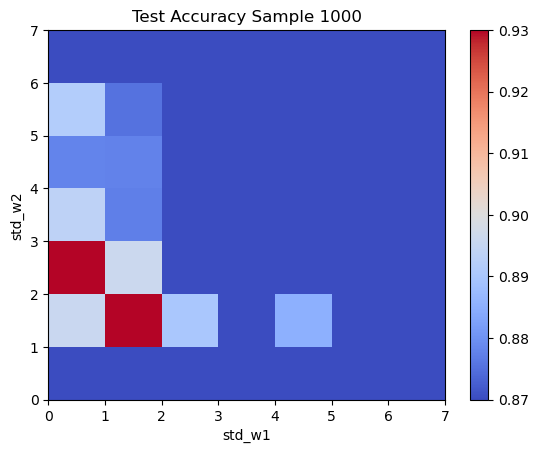

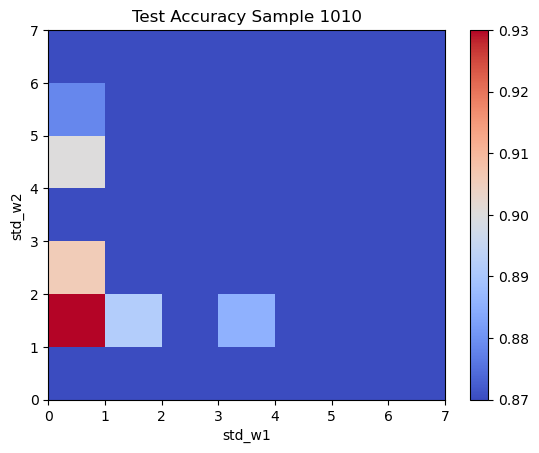

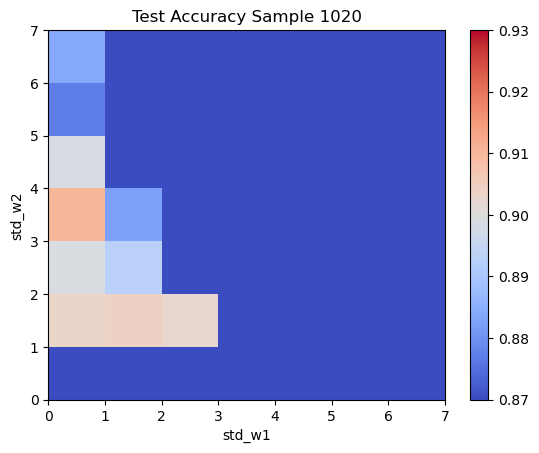

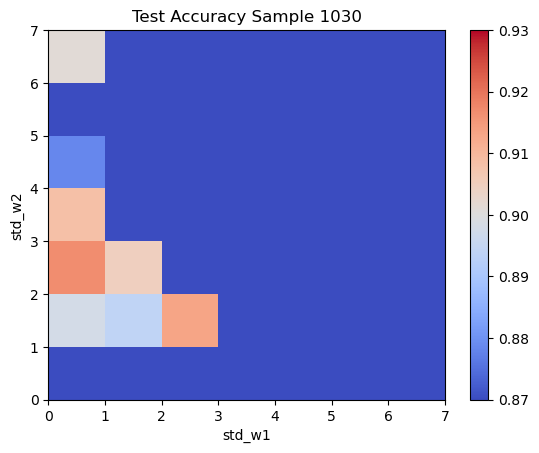

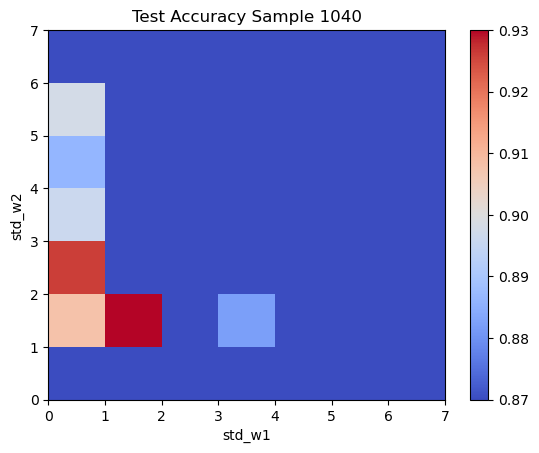

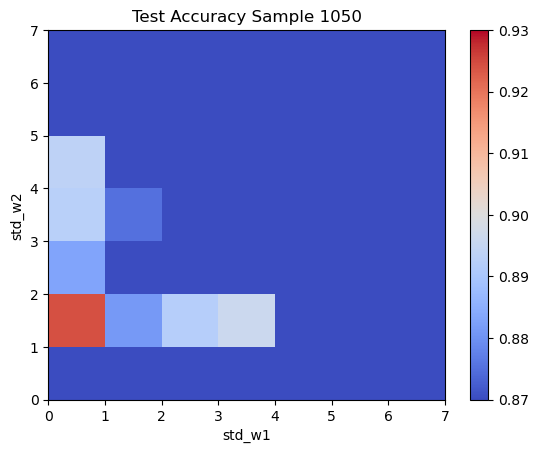

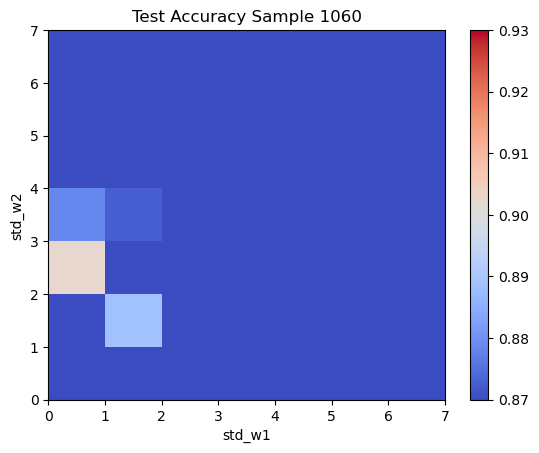

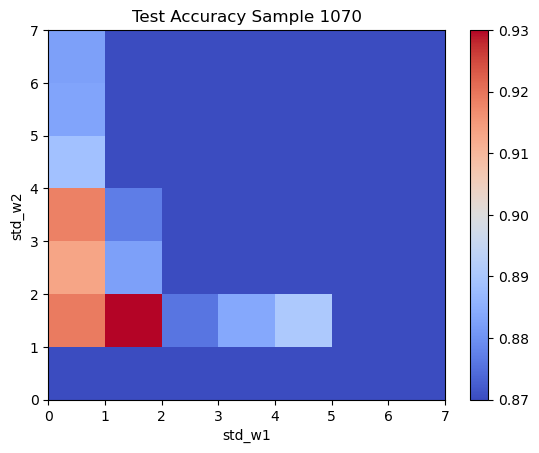

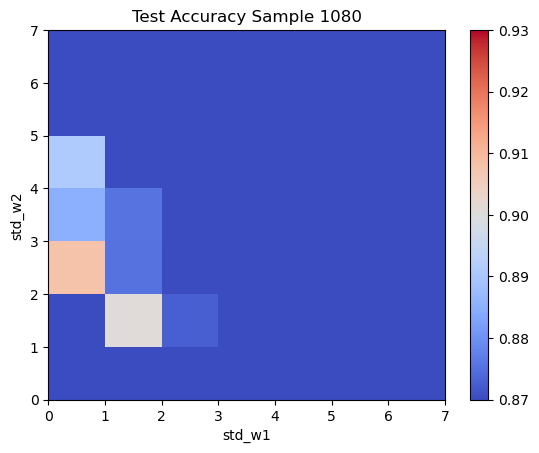

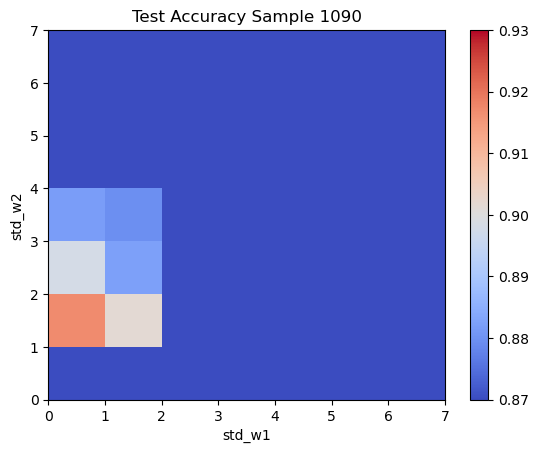

In [27]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'], cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    max_accuracy = np.max(test_accuracy_10_samples[i])
    index_max_accuracy = np.argmax(test_accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, test_accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [28]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [29]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [30]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.07421875, 0.07421875, 0.07421875, 0.07421875, 0.07421875,
        0.07421875, 0.07421875],
       [0.89423077, 0.90561899, 0.8804387 , 0.86903045, 0.84399038,
        0.82048277, 0.79483173],
       [0.90828325, 0.87700321, 0.8435597 , 0.80984575, 0.78172075,
        0.74434095, 0.73483574],
       [0.88334335, 0.87005208, 0.81408253, 0.77278646, 0.73737981,
        0.71553486, 0.69885817],
       [0.87244591, 0.84782652, 0.79396034, 0.75824319, 0.72432893,
        0.67674279, 0.63055889],
       [0.86056691, 0.84128606, 0.7984976 , 0.75043069, 0.69546274,
        0.63465545, 0.57439904],
       [0.83364383, 0.83658854, 0.79217748, 0.72579127, 0.6671274 ,
        0.59701522, 0.53941306]])

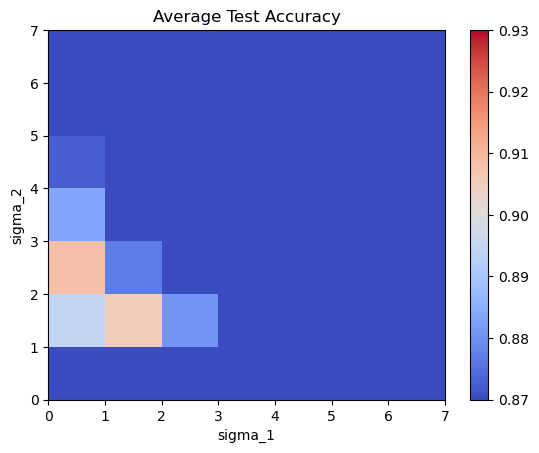

In [31]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_200_0.1.png".format(sample))

In [32]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False],
       [ True,  True,  True,  True, False, False, False],
       [ True,  True, False, False, False, False, False],
       [ True,  True, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [33]:
test1 = average_test_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_test_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_test_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_test_accuracy_grid_10_by_10_10_samples>0.87005209)

print(test2)


[0.86903045 0.87005208 0.87244591 0.87700321 0.8804387  0.88334335
 0.89423077 0.90561899 0.90828325]


In [34]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.015+0.005
    array.append(tbw1_w2)

In [35]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 200
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("test_accuracy_200_seed_{}.npz".format(i),**data)
    i+=1

In [36]:
data = {}
data['frequency'] = 65
data['N'] = 200
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_200",**data)